In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [3]:
data=pd.read_csv(r'pos_rest1')
data.head()

,Order ID,Customer ID,Menu Item,Category,Price,Qty,tax,Total Price,Store_id,Mode,Payment,Date-Time
0,ORD-20221109-1795,CUS-20221130-4382,Blackcurrent Shake,Milk Shakes,120,5,108.0,708.0,A,Take_Away,Others,2022-10-23 13:26:07
1,ORD-20220821-5262,CUS-20220531-408,Blackcurrent Shake,Milk Shakes,120,5,108.0,708.0,B,Dine_in,Cards,2022-12-19 12:28:18
2,ORD-20220922-4607,CUS-20220512-005,Cold Coffee,Milk Shakes,160,2,57.6,377.6,B,Dine_in,UPI,2022-05-12 16:33:11
3,ORD-20220528-4653,CUS-20220723-4865,Bubblegum Shake,Milk Shakes,180,1,32.4,212.4,A,Dine_in,Cash,2022-11-10 14:57:50
4,ORD-20221215-5265,CUS-20220421-011,Chocolate Shake,Milk Shakes,150,2,54.0,354.0,B,Dine_in,Cash,2022-04-21 16:51:43


Data Understanding

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34526 entries, 0 to 34525
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     34526 non-null  object 
 1   Customer ID  34526 non-null  object 
 2   Menu Item    34526 non-null  object 
 3   Category     34526 non-null  object 
 4   Price        34526 non-null  int64  
 5   Qty          34526 non-null  int64  
 6   tax          34526 non-null  float64
 7   Total Price  34526 non-null  float64
 8   Store_id     34526 non-null  object 
 9   Mode         34526 non-null  object 
 10  Payment      34526 non-null  object 
 11  Date-Time    34526 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.2+ MB


In [5]:
data.describe()

,Price,Qty,tax,Total Price
count,34526.000000,34526.000000,34526.000000,34526.000000
mean,189.180820,1.825001,60.651877,397.606752
std,112.696331,0.888785,41.079418,269.298407
min,85.000000,1.000000,15.300000,100.300000
25%,140.000000,1.000000,30.600000,200.600000
50%,169.000000,2.000000,54.000000,354.000000
75%,190.000000,2.000000,71.640000,469.640000
max,700.000000,5.000000,252.000000,1652.000000


Checking for Null Values

In [6]:
data.isnull().sum()

Order ID       0
Customer ID    0
Menu Item      0
Category       0
Price          0
Qty            0
tax            0
Total Price    0
Store_id       0
Mode           0
Payment        0
Date-Time      0
dtype: int64

Checking for Duplicate Values

In [7]:
data.duplicated().sum()

0

In [8]:
duplicate_rows = data[data.duplicated()]
duplicate_rows

,Order ID,Customer ID,Menu Item,Category,Price,Qty,tax,Total Price,Store_id,Mode,Payment,Date-Time


Dropping the Duplicates

In [9]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Outlier Check

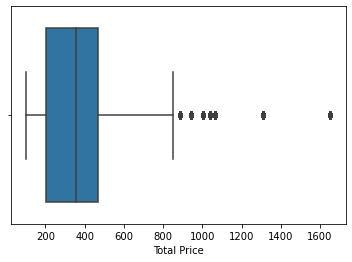

In [10]:
sns.boxplot(x=data["Total Price"],orient="h")
plt.show()

The restaurant has the menu item with higher price say 700INR so the values are varied from 200-1600. So, No issue with ouliers

Unique value in each column

In [11]:
unique_vals = data.nunique()
print(unique_vals)

Order ID       27965
Customer ID    29450
Menu Item         46
Category           8
Price             21
Qty                5
tax               56
Total Price       56
Store_id           3
Mode               2
Payment            4
Date-Time      34490
dtype: int64


In [12]:
for column in data.columns:
     if data[column].dtype == 'object' and column not in ["Order ID","Customer ID","Date","Time"]:
        print("Unique values in column '{}': {}".format(column, data[column].unique()))

Unique values in column 'Menu Item': ['Blackcurrent Shake' 'Cold Coffee' 'Bubblegum Shake' 'Chocolate Shake'
 'Dry Fruit Shake' 'Classic Vannila' 'Oreo' 'Crunchy Butter Scotch'
 'Alphonso Mango Shake' 'Burger Combo' 'The Indian Tikka Combo'
 'Best Biryani Combo' 'Chicken 65 Briyani Combo' 'BBQ Party Combo'
 'Bbq Paneer Tikka' 'Chicken Laal Tikka' 'Barbecue Chicken Dumsticks'
 'Chicken 65 Boneless' 'Peri Peri Chicken Wings'
 'Smokey Grilled Chicken Lollipop' 'Pepper Manchurian'
 'Texas Chicken Manchurian' 'Stick Kebab' 'Fried Chicken Biryani'
 'Barbeque Chicken Biryani' 'Mughlai Chicken Dum Biryani'
 'Chicken Winglet Biryani' 'Chicken Street Burger' 'Chicken Tower Burger'
 'Classic Veg Burger' 'Chicken Cheese Burst Burger' 'Paan Mojito'
 'Virgin Mojito' 'Bubblegum Mojito' 'Blue Curacao Mojito' 'Lord Of Wings'
 'Chicken Popcorn' 'Fried Chicken Wings' 'Drums Of Heaven'
 'Chicken Lava Shots' 'Peri Peri Al Faham' 'Peri Peri Hot Wings'
 'Red Sauce Chicken Pasta' 'White Sauce Veg Pasta'
 'Whi

# Data Analysis

In [13]:
# Total Sales
data["Total Price"].sum()

13727770.72

In [14]:
#Total Number of orders
data["Order ID"].nunique()

27965

In [15]:
categorical= data[["Category","Menu Item","Store_id","Mode","Payment"]]
categorical

,Category,Menu Item,Store_id,Mode,Payment
0,Milk Shakes,Blackcurrent Shake,A,Take_Away,Others
1,Milk Shakes,Blackcurrent Shake,B,Dine_in,Cards
2,Milk Shakes,Cold Coffee,B,Dine_in,UPI
3,Milk Shakes,Bubblegum Shake,A,Dine_in,Cash
4,Milk Shakes,Chocolate Shake,B,Dine_in,Cash
...,...,...,...,...,...
34521,Pasta,Red Sauce Chicken Pasta,A,Take_Away,UPI
34522,Pasta,White Sauce Veg Pasta,B,Dine_in,Others
34523,Pasta,White Sauce Veg Pasta,A,Dine_in,UPI
34524,Pasta,White Sauce Chicken Pasta,A,Dine_in,UPI


In [16]:
#Sales By Categories
cat_sales= pd.DataFrame(data.groupby(by="Category").agg({"Total Price":"sum","Qty":"sum"})).reset_index()
cat_sales

,Category,Total Price,Qty
0,Biriyani,2879164.60,12358
1,Burgers,1517284.12,9548
2,Combos,3027408.00,5491
3,Milk Shakes,2071749.60,11270
4,Mojito,524268.10,5227
5,Pasta,752018.72,3776
6,Special,1074922.18,5294
7,Starters,1880955.40,10046


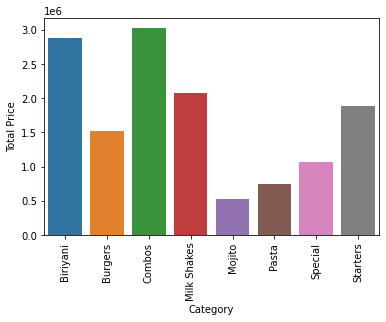

In [17]:
sns.barplot(x="Category",y="Total Price", data=cat_sales)
plt.xticks(rotation=90)
plt.show()

In [18]:
menu_sales= pd.DataFrame(data.groupby(by="Menu Item")["Total Price","Qty"].sum()).reset_index()
menu_sales

C:\Users\MOHANKUMAR\AppData\Local\Temp\ipykernel_18940\2546645433.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  menu_sales= pd.DataFrame(data.groupby(by="Menu Item")["Total Price","Qty"].sum()).reset_index()


,Menu Item,Total Price,Qty
0,Alphonso Mango Shake,252555.40,1259
1,BBQ Party Combo,702052.80,1072
2,Barbecue Chicken Dumsticks,195101.20,1181
3,Barbeque Chicken Biryani,699279.80,3119
4,Bbq Paneer Tikka,219657.00,1095
5,Best Biryani Combo,444388.00,1076
6,Blackcurrent Shake,197248.80,1393
7,Blue Curacao Mojito,125976.80,1256
8,Bubblegum Mojito,131994.80,1316
9,Bubblegum Shake,250632.00,1180


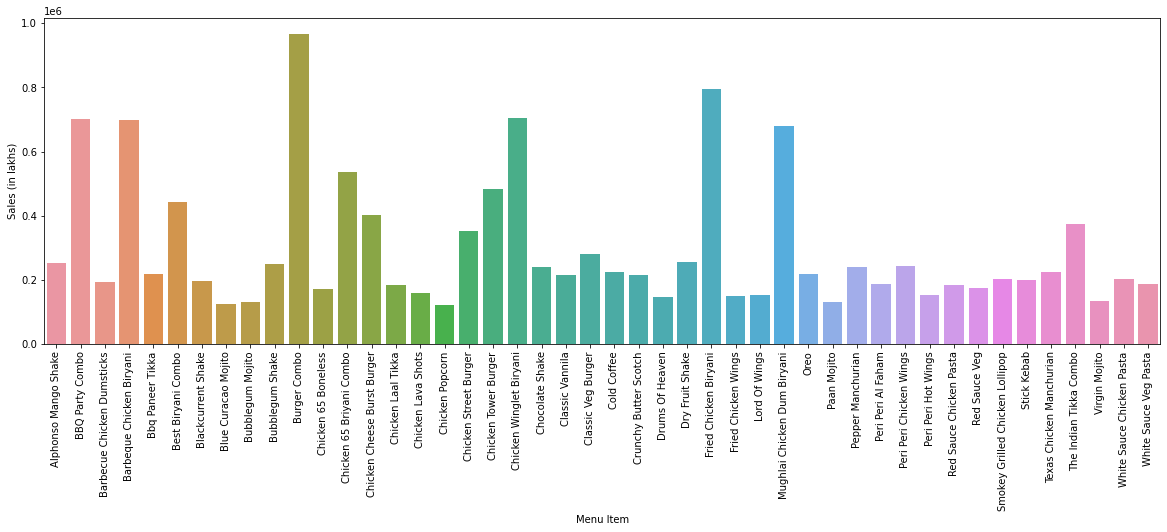

In [19]:

plt.subplots(figsize=(20, 6))

sns.barplot(x=menu_sales["Menu Item"],y=menu_sales["Total Price"])
plt.ylabel("Sales (in lakhs)")
plt.xticks(rotation=90)
plt.show()

In [20]:
store_sales=pd.DataFrame(data.groupby(by="Store_id")["Total Price","Qty"].sum()).reset_index()
store_sales

C:\Users\MOHANKUMAR\AppData\Local\Temp\ipykernel_18940\1003744440.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  store_sales=pd.DataFrame(data.groupby(by="Store_id")["Total Price","Qty"].sum()).reset_index()


,Store_id,Total Price,Qty
0,A,5495262.36,25274
1,B,4868408.60,22140
2,c,3364099.76,15596


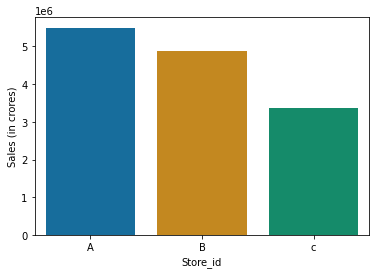

In [21]:
sns.set_palette("colorblind")
sns.barplot(x=store_sales["Store_id"],y=store_sales["Total Price"])
plt.ylabel("Sales (in crores)")
plt.show()

In [22]:
mode_sales=pd.DataFrame(data.groupby(by="Mode")["Total Price"].sum()).reset_index()
mode_sales

,Mode,Total Price
0,Dine_in,9620633.22
1,Take_Away,4107137.50


<function matplotlib.pyplot.show(close=None, block=None)>

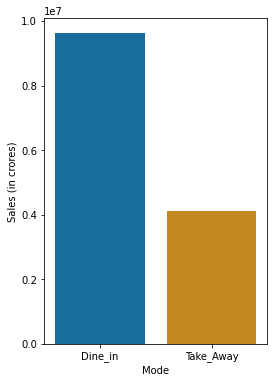

In [23]:
plt.subplots(figsize=(4,6))
sns.barplot(x=mode_sales["Mode"],y=mode_sales["Total Price"])
plt.ylabel("Sales (in crores)")
plt.show

In [24]:
pay_sales=pd.DataFrame(data.groupby(by="Payment").agg({"Total Price":"sum","Qty":"sum"})).reset_index()
pay_sales

,Payment,Total Price,Qty
0,Cards,3424644.38,15618
1,Cash,4834924.92,22304
2,Others,696919.80,3166
3,UPI,4771281.62,21922


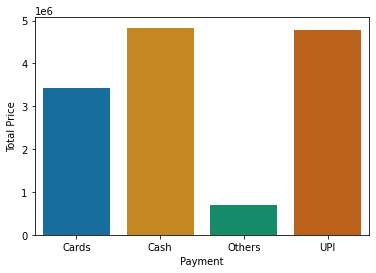

In [25]:
sns.barplot(x=pay_sales["Payment"],y=pay_sales["Total Price"])
plt.show()

Sale Vs Quantity Sold

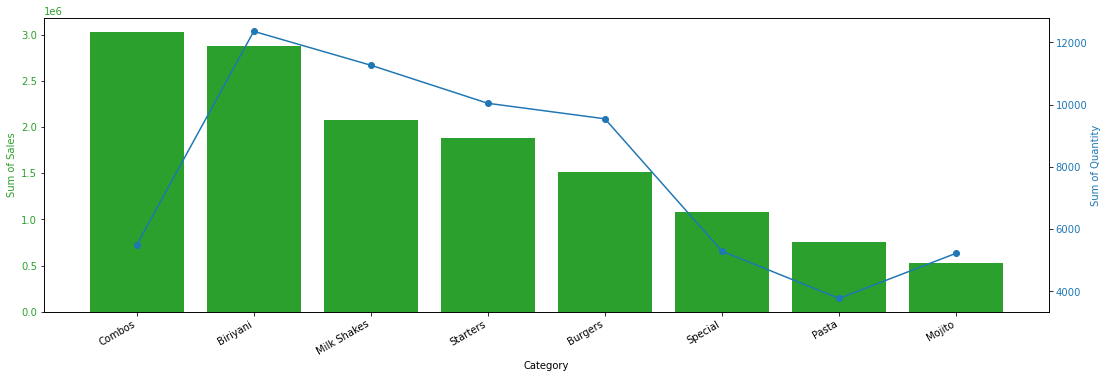

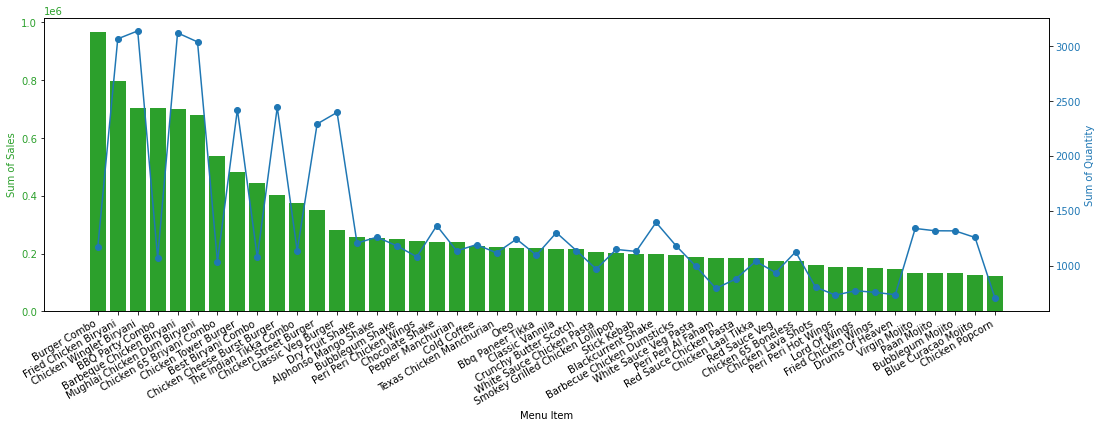

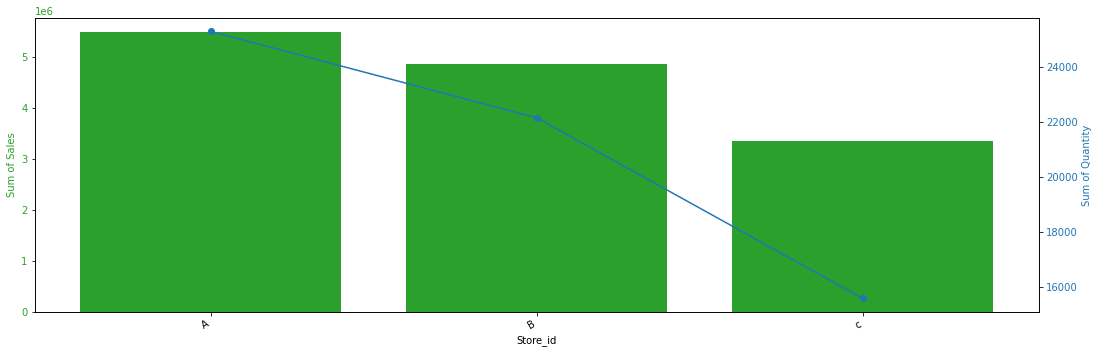

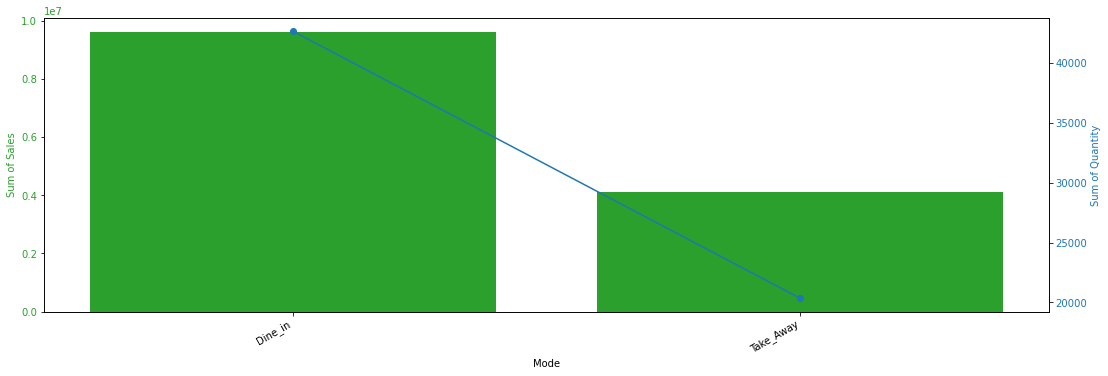

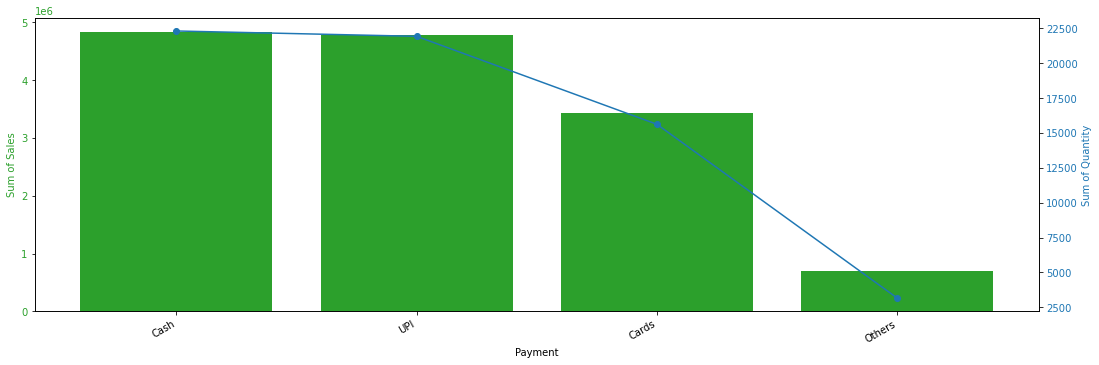

In [26]:
for column in categorical: 
    df_sum = data.groupby(column).agg({"Total Price":"sum", "Qty":"sum"}).reset_index()
    df_sum=df_sum.sort_values(by="Total Price",ascending=False)
    
    
    # Plot the chart
    fig, ax1 = plt.subplots(figsize=(18,6))

    color = 'tab:green'
    ax1.set_xlabel(column)
    ax1.set_ylabel("Sum of Sales", color=color)
    ax1.bar(df_sum[column], df_sum["Total Price"], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel("Sum of Quantity", color=color)
    ax2.plot(df_sum[column], df_sum["Qty"], 'o-', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    fig.autofmt_xdate()
    plt.xticks(df_sum[column], rotation=90)
    plt.show()

Category Vs Store Id

In [27]:
pivot_table=data.pivot_table(values="Total Price",index="Category",columns="Store_id",aggfunc="sum")
pivot_table

Store_id,A,B,c
Category,,,
Biriyani,1134935.80,1045609.80,698619.00
Burgers,617103.42,524800.28,375380.42
Combos,1208243.30,1096284.90,722879.80
Milk Shakes,846237.00,715705.40,509807.20
Mojito,207621.00,176227.10,140420.00
Pasta,296755.84,268163.26,187099.62
Special,438039.60,370174.26,266708.32
Starters,746326.40,671443.60,463185.40


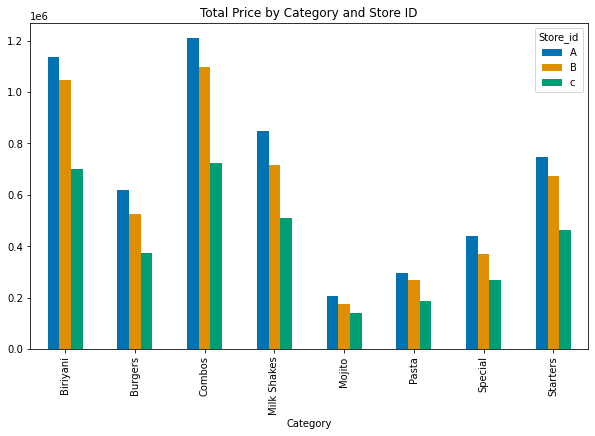

In [27]:
pivot_table.plot(kind='bar', figsize=(10, 6))

# Add a title to the chart
plt.title("Total Price by Category and Store ID")

# Show the chart
plt.show()

Category Vs Mode

<AxesSubplot:xlabel='Category'>

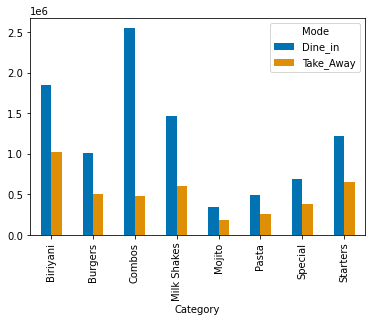

In [28]:
pivot2=data.pivot_table(values="Total Price",index="Category",columns="Mode",aggfunc="sum")
pivot2.plot(kind="bar")

MenuItem vs Store

<AxesSubplot:xlabel='Menu Item'>

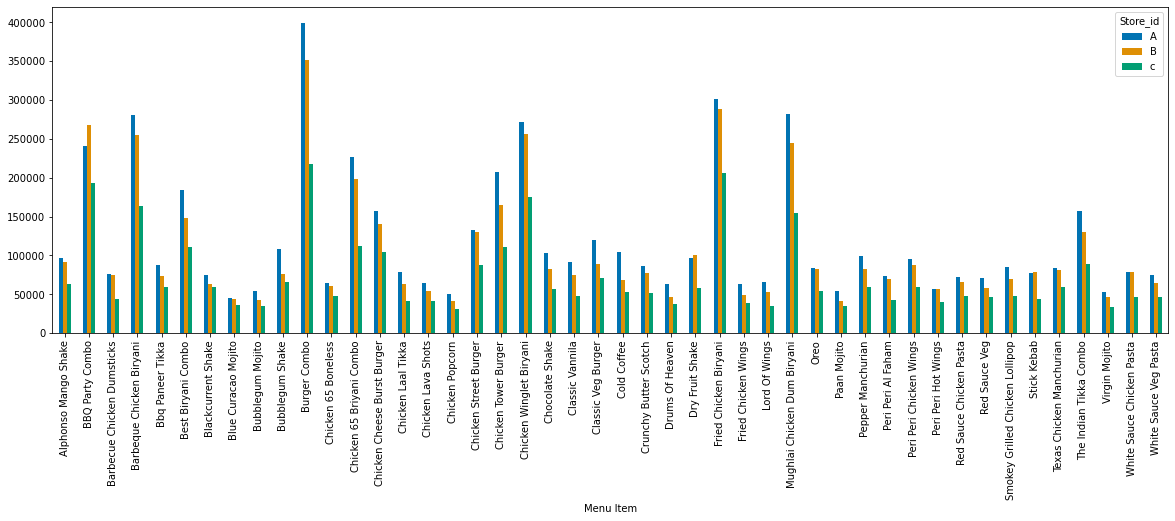

In [29]:
pivot3=data.pivot_table(values="Total Price",index="Menu Item",columns="Store_id",aggfunc="sum")
pivot3.plot(kind="bar", figsize=(20,6))

MenuItem Vs Mode

<AxesSubplot:xlabel='Menu Item'>

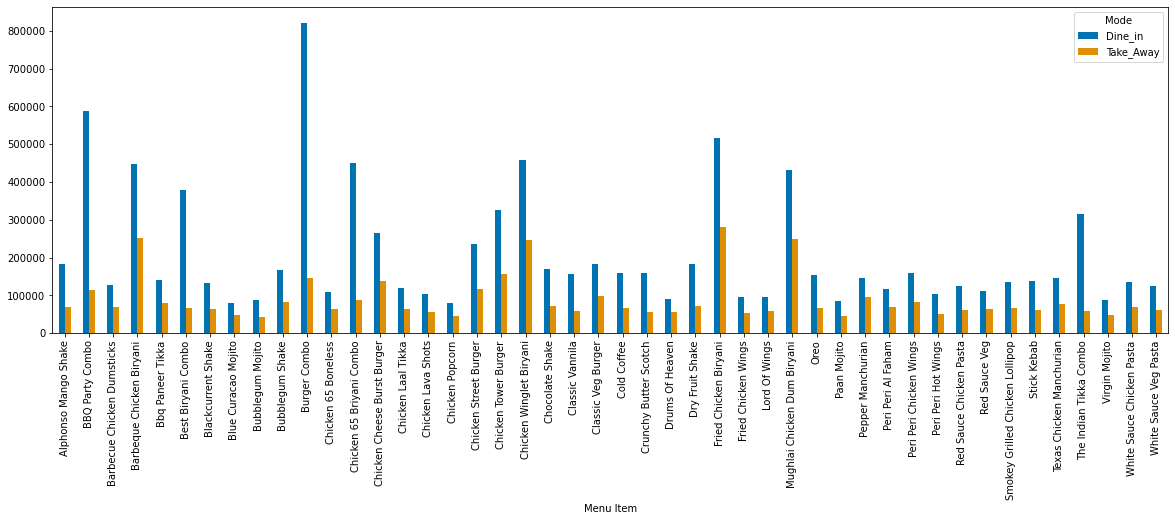

In [30]:
pivot4=data.pivot_table(values="Total Price",index="Menu Item",columns="Mode",aggfunc="sum")
pivot4.plot(kind="bar", figsize=(20,6))

Store Vs Mode

<AxesSubplot:xlabel='Store_id'>

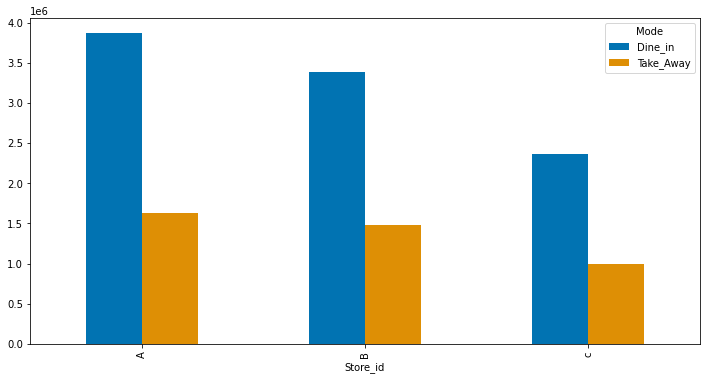

In [31]:
pivot3=data.pivot_table(values="Total Price",index="Store_id",columns="Mode",aggfunc="sum")
pivot3.plot(kind="bar",figsize=(12,6))

Store Vs Payment Type

<AxesSubplot:xlabel='Store_id'>

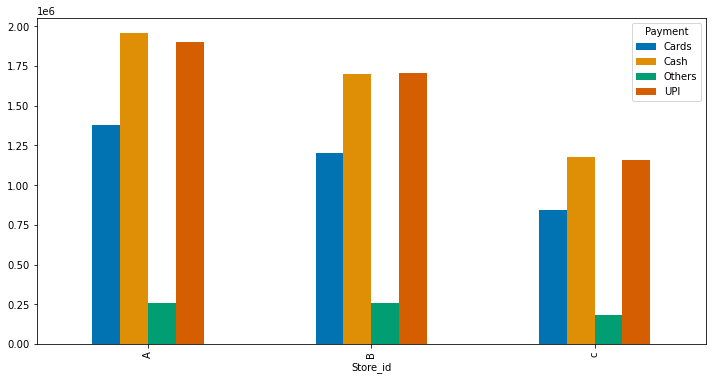

In [32]:
pivot3=data.pivot_table(values="Total Price",index="Store_id",columns="Payment",aggfunc="sum")
pivot3.plot(kind="bar",figsize=(12,6))

EDA TIME SERIES
https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

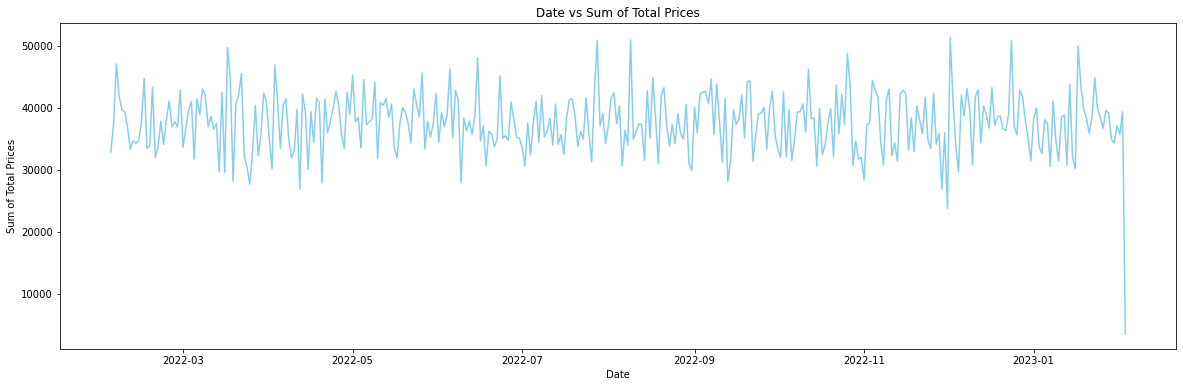

In [33]:
data["Date-Time"]=pd.to_datetime(data["Date-Time"])
grouped = data.groupby(data['Date-Time'].dt.date).sum()
plt.subplots(figsize=(20,6))
# Plot the date vs sum of total prices using matplotlib
plt.plot(grouped.index, grouped['Total Price'], color='skyblue')

# Add a title to the chart
plt.title("Date vs Sum of Total Prices")

# Add labels to the x and y axis
plt.xlabel("Date")
plt.ylabel("Sum of Total Prices")

# Show the chart
plt.show()

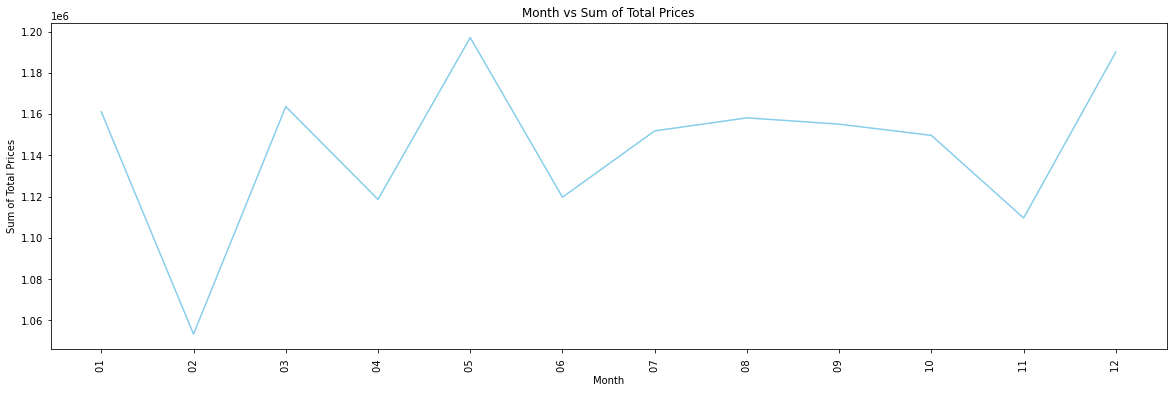

In [34]:
data['Month'] = data['Date-Time'].dt.strftime('%m ')

# Group the data by month and calculate the sum of total prices for each month
grouped = data.groupby('Month').sum()

grouped = grouped.sort_index(ascending=True)

# Plot the month vs sum of total prices using matplotlib
plt.subplots(figsize=(20,6))
plt.plot(grouped.index, grouped['Total Price'], color='skyblue')

# Add a title to the chart
plt.title("Month vs Sum of Total Prices")

# Add labels to the x and y axis
plt.xlabel("Month")
plt.ylabel("Sum of Total Prices")

# Rotate the x axis labels to make them easier to read
plt.xticks(rotation=90)

# Show the chart
plt.show()

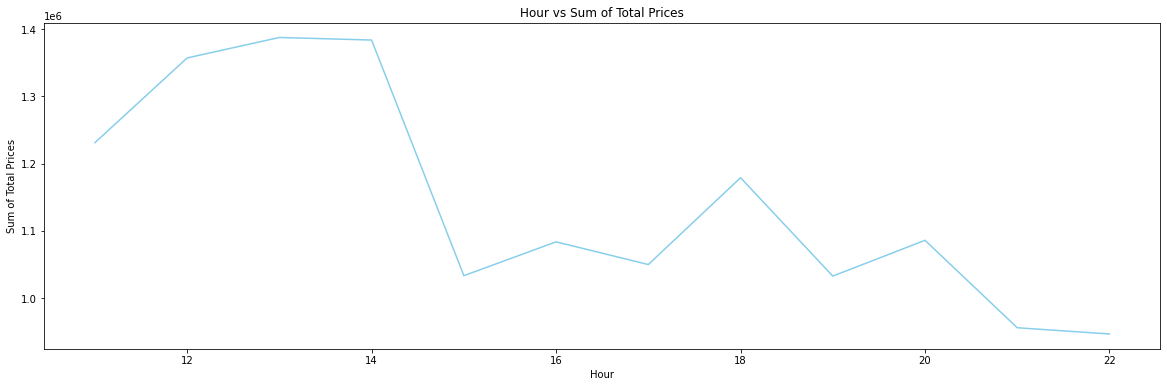

In [35]:
data['Hour'] = data['Date-Time'].dt.hour

# Group the data by hour and calculate the sum of total prices for each hour
grouped = data.groupby('Hour').sum()

# Plot the hour vs sum of total prices using matplotlib
plt.subplots(figsize=(20,6))
plt.plot(grouped.index, grouped['Total Price'], color='skyblue')

# Add a title to the chart
plt.title("Hour vs Sum of Total Prices")

# Add labels to the x and y axis
plt.xlabel("Hour")
plt.ylabel("Sum of Total Prices")

# Show the chart
plt.show()

<AxesSubplot:xlabel='Hour'>

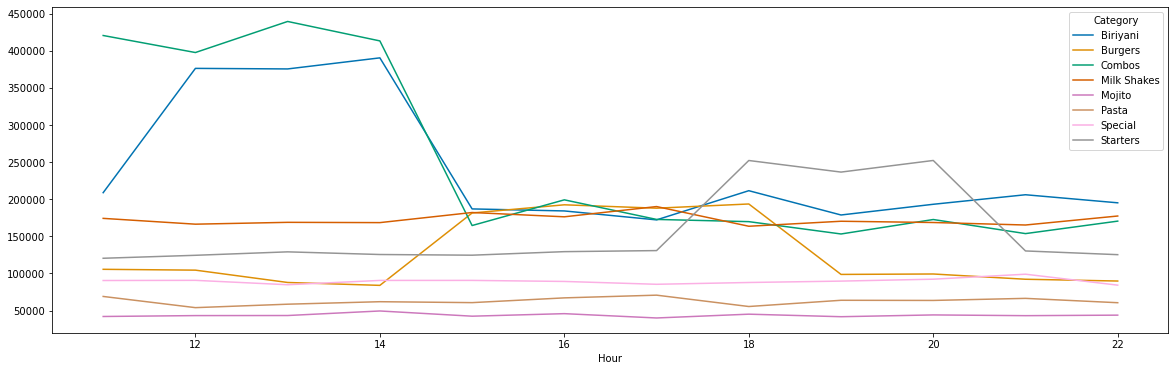

In [36]:
data.pivot_table(values="Total Price", index="Hour", columns="Category",aggfunc="sum").plot(figsize=(20,6))

<AxesSubplot:xlabel='Weekday'>

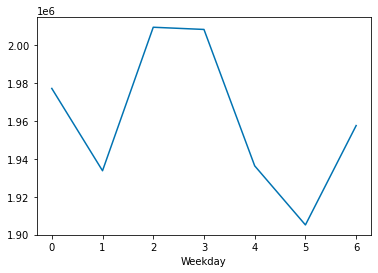

In [37]:
data["Weekday"] = data["Date-Time"].dt.dayofweek
weekday_group = data.groupby("Weekday")["Total Price"].sum()
weekday_group.plot()

In [38]:
data['Date'] = data['Date-Time'].dt.date

In [39]:
date_sales=pd.DataFrame(data.groupby(by="Date")["Total Price"].sum())
date_sales

,Total Price
Date,
2022-02-03,32820.52
2022-02-04,37309.24
2022-02-05,47039.52
2022-02-06,41763.74
2022-02-07,39603.16
...,...
2023-01-30,34304.96
2023-01-31,37057.90
2023-02-01,35633.64


<AxesSubplot:xlabel='Date'>

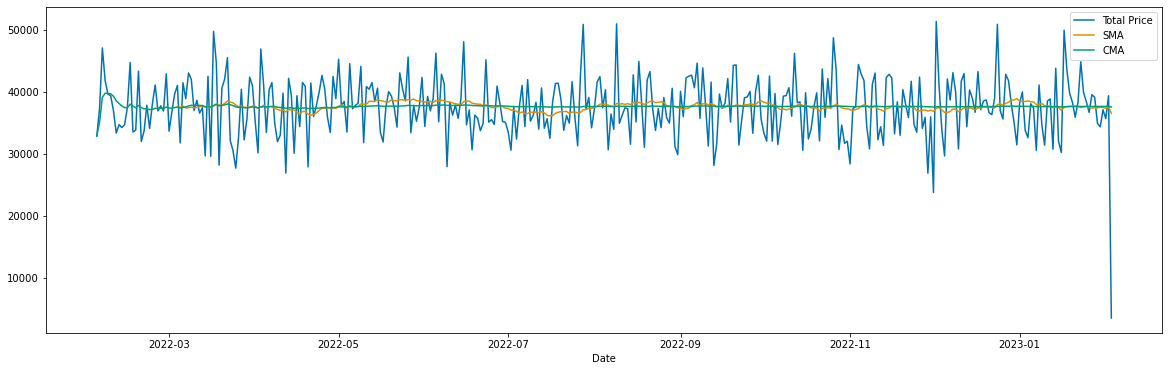

In [40]:
#Simple Moving Average
date_sales["SMA"] = date_sales["Total Price"].rolling(30).mean()
#Cummulative Moving Average
date_sales["CMA"]=date_sales["Total Price"].expanding().mean()
date_sales[["Total Price", "SMA", "CMA"]].plot(figsize=(20,6))

In [41]:
pd.DataFrame(data.groupby(by="Date")["Total Price"].count())

,Total Price
Date,
2022-02-03,94
2022-02-04,92
2022-02-05,106
2022-02-06,101
2022-02-07,94
...,...
2023-01-30,87
2023-01-31,80
2023-02-01,78


In [42]:
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index of the dataframe
data = data.set_index("Date")
date_menu=data.pivot_table(values="Total Price",index="Date",columns="Menu Item",aggfunc="sum")
date_menu

Menu Item,Alphonso Mango Shake,BBQ Party Combo,Barbecue Chicken Dumsticks,Barbeque Chicken Biryani,Bbq Paneer Tikka,Best Biryani Combo,Blackcurrent Shake,Blue Curacao Mojito,Bubblegum Mojito,Bubblegum Shake,...,Peri Peri Hot Wings,Red Sauce Chicken Pasta,Red Sauce Veg,Smokey Grilled Chicken Lollipop,Stick Kebab,Texas Chicken Manchurian,The Indian Tikka Combo,Virgin Mojito,White Sauce Chicken Pasta,White Sauce Veg Pasta
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-03,NaN,1964.7,NaN,1121.0,401.2,413.0,566.4,501.5,100.3,NaN,...,211.22,422.44,1313.34,531.0,354.0,1203.6,991.2,100.3,422.44,562.86
2022-02-04,1203.6,1309.8,826.0,3587.2,1003.0,826.0,283.2,702.1,100.3,1486.8,...,211.22,422.44,187.62,531.0,885.0,401.2,660.8,200.6,211.22,NaN
2022-02-05,802.4,1309.8,660.8,4708.2,1404.2,1652.0,1699.2,200.6,300.9,637.2,...,422.44,633.66,375.24,NaN,531.0,200.6,991.2,601.8,1056.10,375.24
2022-02-06,1003.0,3929.4,330.4,1121.0,1003.0,1239.0,708.0,100.3,401.2,637.2,...,422.44,844.88,375.24,885.0,354.0,1203.6,660.8,501.5,211.22,187.62
2022-02-07,2006.0,2619.6,165.2,1345.2,401.2,1239.0,NaN,NaN,1003.0,1699.2,...,422.44,422.44,562.86,354.0,885.0,1203.6,991.2,702.1,NaN,750.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,2006.0,1309.8,826.0,896.8,1404.2,826.0,NaN,601.8,200.6,637.2,...,422.44,211.22,375.24,1062.0,177.0,802.4,991.2,902.7,422.44,375.24
2023-01-31,NaN,654.9,330.4,2242.0,NaN,NaN,708.0,NaN,300.9,1486.8,...,211.22,211.22,375.24,354.0,354.0,401.2,330.4,200.6,1478.54,938.10
2023-02-01,NaN,1309.8,NaN,3363.0,200.6,2065.0,566.4,NaN,200.6,2761.2,...,NaN,NaN,NaN,NaN,NaN,601.8,991.2,NaN,NaN,562.86


In [43]:
date_menu = data.pivot_table(values="Total Price",index="Date",columns="Menu Item",aggfunc="sum")

# Resample the pivot table by year and select the maximum value for each year for each menu item
date_menu_min= date_menu.resample('M').min()
date_menu_min

Menu Item,Alphonso Mango Shake,BBQ Party Combo,Barbecue Chicken Dumsticks,Barbeque Chicken Biryani,Bbq Paneer Tikka,Best Biryani Combo,Blackcurrent Shake,Blue Curacao Mojito,Bubblegum Mojito,Bubblegum Shake,...,Peri Peri Hot Wings,Red Sauce Chicken Pasta,Red Sauce Veg,Smokey Grilled Chicken Lollipop,Stick Kebab,Texas Chicken Manchurian,The Indian Tikka Combo,Virgin Mojito,White Sauce Chicken Pasta,White Sauce Veg Pasta
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,200.6,654.9,165.2,224.2,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-03-31,200.6,654.9,165.2,448.4,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-04-30,200.6,654.9,165.2,224.2,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-05-31,200.6,654.9,165.2,224.2,200.6,413.0,283.2,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-06-30,200.6,654.9,165.2,224.2,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-07-31,401.2,654.9,165.2,672.6,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-08-31,200.6,654.9,165.2,448.4,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-09-30,200.6,654.9,165.2,448.4,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62
2022-10-31,200.6,654.9,165.2,224.2,200.6,413.0,141.6,100.3,100.3,212.4,...,211.22,211.22,187.62,177.0,177.0,200.6,330.4,100.3,211.22,187.62


In [44]:
date_menu = data.pivot_table(values="Total Price",index="Date",columns="Menu Item",aggfunc="sum")

# Resample the pivot table by year and select the maximum value for each year for each menu item
date_menu_max= date_menu.resample('M').max()

date_menu_max

Menu Item,Alphonso Mango Shake,BBQ Party Combo,Barbecue Chicken Dumsticks,Barbeque Chicken Biryani,Bbq Paneer Tikka,Best Biryani Combo,Blackcurrent Shake,Blue Curacao Mojito,Bubblegum Mojito,Bubblegum Shake,...,Peri Peri Hot Wings,Red Sauce Chicken Pasta,Red Sauce Veg,Smokey Grilled Chicken Lollipop,Stick Kebab,Texas Chicken Manchurian,The Indian Tikka Combo,Virgin Mojito,White Sauce Chicken Pasta,White Sauce Veg Pasta
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-28,2407.2,5239.2,1652.0,4708.2,1604.8,2891.0,1699.2,802.4,1003.0,2336.4,...,1267.32,1689.76,1313.34,1416.0,1770.0,1604.8,2973.6,702.1,1267.32,1500.96
2022-03-31,3009.0,5894.1,1156.4,4035.6,1805.4,4543.0,1982.4,702.1,1303.9,1911.6,...,1056.10,1478.54,1688.58,1416.0,1239.0,2206.6,2643.2,1003.0,1056.10,1688.58
2022-04-30,1604.8,3929.4,1652.0,4035.6,1404.2,3304.0,1699.2,1003.0,1303.9,3823.2,...,1056.10,1267.32,2063.82,1416.0,1593.0,1805.4,2312.8,902.7,1900.98,1500.96
2022-05-31,2407.2,3929.4,1486.8,3138.8,1604.8,2891.0,2124.0,1003.0,1003.0,2548.8,...,1478.54,1478.54,1500.96,1239.0,1593.0,2206.6,2643.2,1003.0,1267.32,1500.96
2022-06-30,3209.6,6549.0,1486.8,4484.0,1604.8,4130.0,2124.0,802.4,702.1,2548.8,...,844.88,1267.32,1125.72,1947.0,1416.0,1203.6,3304.0,702.1,1689.76,1313.34
2022-07-31,2607.8,5239.2,1652.0,5380.8,1604.8,4956.0,1699.2,1003.0,802.4,2973.6,...,1267.32,1267.32,1313.34,1239.0,1416.0,1203.6,2973.6,1003.0,2323.42,1313.34
2022-08-31,2808.4,6549.0,991.2,4484.0,1404.2,3717.0,1840.8,1203.6,902.7,2124.0,...,844.88,1689.76,1125.72,1593.0,2301.0,1604.8,3304.0,1203.6,1900.98,2063.82
2022-09-30,3209.6,5239.2,1321.6,4708.2,1805.4,2891.0,1982.4,702.1,1003.0,2761.2,...,1478.54,1689.76,1688.58,1062.0,1239.0,1203.6,3964.8,902.7,1689.76,1688.58
2022-10-31,2407.2,7203.9,1321.6,4259.8,1805.4,4956.0,2124.0,902.7,1003.0,2336.4,...,1267.32,1267.32,1125.72,1239.0,1593.0,1604.8,3964.8,601.8,1689.76,938.10


In [45]:
date_cat=data.pivot_table(values="Total Price",index="Date",columns="Category",aggfunc="sum")
date_cat

Category,Biriyani,Burgers,Combos,Milk Shakes,Mojito,Pasta,Special,Starters
Date,,,,,,,,
2022-02-03,6301.2,3819.66,6059.3,4165.4,1103.3,2721.08,3883.38,4767.2
2022-02-04,7504.8,6383.80,3622.6,10124.4,1003.0,821.28,1713.36,6136.0
2022-02-05,11823.6,4001.38,7988.6,10738.0,1604.8,2440.24,3085.70,5357.2
2022-02-06,8826.4,3640.30,9345.6,7811.6,1705.1,1618.96,3210.78,5605.0
2022-02-07,6560.8,3637.94,8366.2,11835.4,1805.4,1735.78,1744.04,3917.6
...,...,...,...,...,...,...,...,...
2023-01-30,9062.4,2809.58,4165.4,5711.2,2006.0,1384.14,2416.64,6749.6
2023-01-31,8850.0,3314.62,12667.3,4755.4,601.8,3003.10,844.88,3020.8
2023-02-01,5711.2,7091.80,8920.8,6820.4,501.5,562.86,2638.48,3386.6


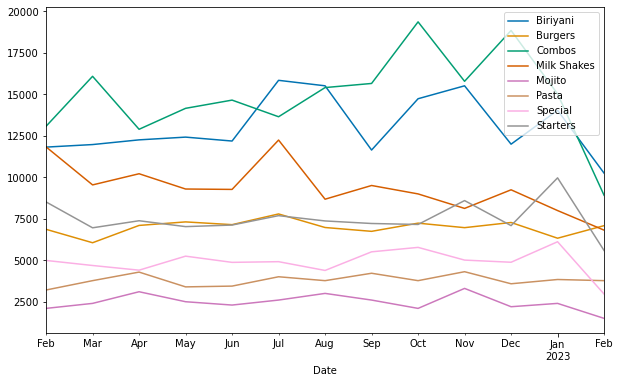

In [46]:
date_cat_max=date_cat.resample(rule="M").max()
ax = date_cat_max.plot(figsize=(10,6))
ax.legend(loc='upper right')

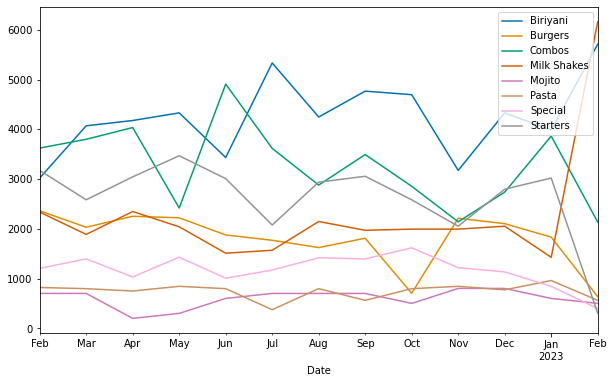

In [47]:
date_cat_min=date_cat.resample(rule="M").min()
ax = date_cat_min.plot(figsize=(10,6))
ax.legend(loc='upper right')

In [48]:
date_store=data.pivot_table(values="Total Price",index="Date",columns="Store_id",aggfunc="sum")


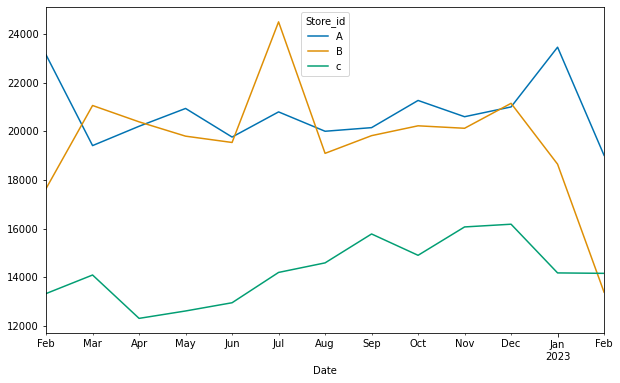

In [49]:
date_store_max=date_store.resample(rule="M").max()
date_store_max.plot(figsize=(10,6))
ax.legend(loc='upper right')

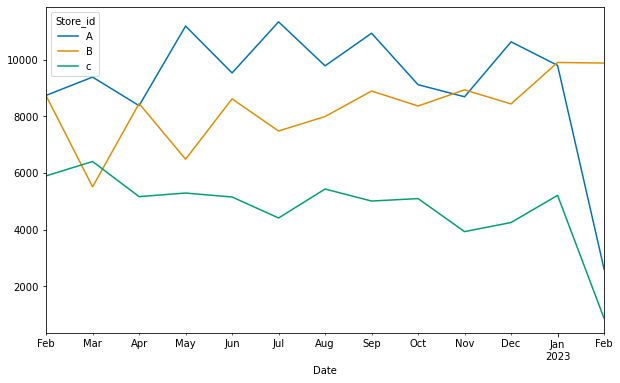

In [50]:
date_store_min=date_store.resample(rule="M").min()
date_store_min.plot(figsize=(10,6))
ax.legend(loc='upper right')

In [51]:
date_mode=data.pivot_table(values="Total Price",index="Date",columns="Mode",aggfunc="sum")
date_mode

Mode,Dine_in,Take_Away
Date,,
2022-02-03,23000.56,9819.96
2022-02-04,25164.68,12144.56
2022-02-05,34896.14,12143.38
2022-02-06,29751.34,12012.40
2022-02-07,29410.32,10192.84
...,...,...
2023-01-30,23405.30,10899.66
2023-01-31,27118.76,9939.14
2023-02-01,23644.84,11988.80


<AxesSubplot:xlabel='Date'>

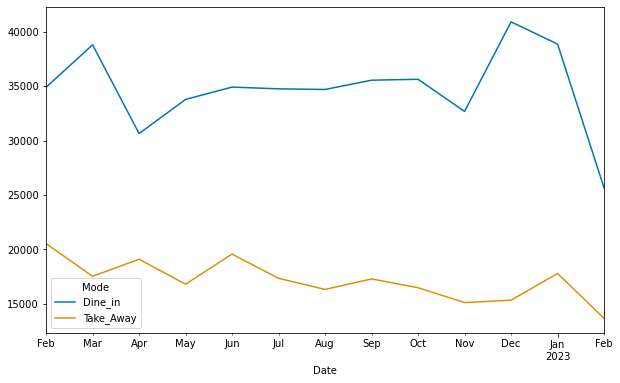

In [52]:
date_mode_max=date_mode.resample(rule="M").max()
date_mode_max.plot(figsize=(10,6))


<AxesSubplot:xlabel='Date'>

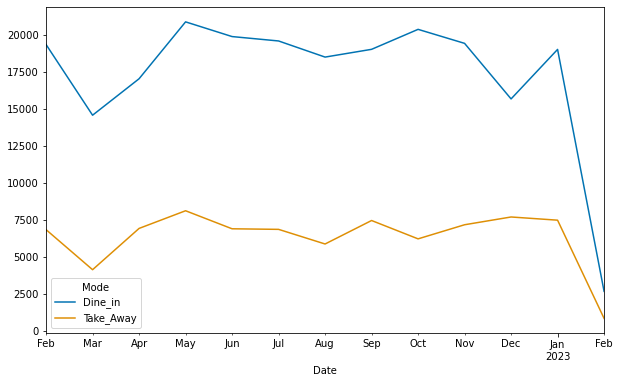

In [53]:
date_mode_min=date_mode.resample(rule="M").min()
date_mode_min.plot(figsize=(10,6))


In [54]:
data

,Order ID,Customer ID,Menu Item,Category,Price,Qty,tax,Total Price,Store_id,Mode,Payment,Date-Time,Month,Hour,Weekday
Date,,,,,,,,,,,,,,,
2022-10-23,ORD-20221109-1795,CUS-20221130-4382,Blackcurrent Shake,Milk Shakes,120,5,108.00,708.00,A,Take_Away,Others,2022-10-23 13:26:07,10,13,6
2022-12-19,ORD-20220821-5262,CUS-20220531-408,Blackcurrent Shake,Milk Shakes,120,5,108.00,708.00,B,Dine_in,Cards,2022-12-19 12:28:18,12,12,0
2022-05-12,ORD-20220922-4607,CUS-20220512-005,Cold Coffee,Milk Shakes,160,2,57.60,377.60,B,Dine_in,UPI,2022-05-12 16:33:11,05,16,3
2022-11-10,ORD-20220528-4653,CUS-20220723-4865,Bubblegum Shake,Milk Shakes,180,1,32.40,212.40,A,Dine_in,Cash,2022-11-10 14:57:50,11,14,3
2022-04-21,ORD-20221215-5265,CUS-20220421-011,Chocolate Shake,Milk Shakes,150,2,54.00,354.00,B,Dine_in,Cash,2022-04-21 16:51:43,04,16,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,ORD-20220325-2559,CUS-20230127-4990,Red Sauce Chicken Pasta,Pasta,179,1,32.22,211.22,A,Take_Away,UPI,2023-01-27 22:42:29,01,22,4
2022-08-30,ORD-20220830-4991,CUS-20220906-264,White Sauce Veg Pasta,Pasta,159,2,57.24,375.24,B,Dine_in,Others,2022-08-30 22:32:28,08,22,1
2022-07-23,ORD-20220723-4993,CUS-20220723-4993,White Sauce Veg Pasta,Pasta,159,1,28.62,187.62,A,Dine_in,UPI,2022-07-23 20:07:51,07,20,5


In [151]:
time_data=pd.DataFrame(data.groupby(by="Date")["Total Price"].sum()).sort_index()
time_data

,Total Price
Date,
2022-02-03,32820.52
2022-02-04,37309.24
2022-02-05,47039.52
2022-02-06,41763.74
2022-02-07,39603.16
...,...
2023-01-30,34304.96
2023-01-31,37057.90
2023-02-01,35633.64


In [152]:
time_data = time_data.reset_index(drop=False)

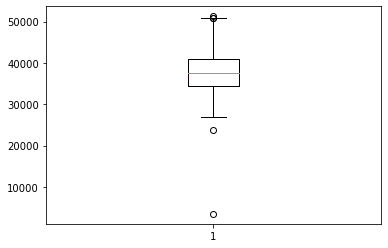

In [58]:
plt.boxplot(time_data)
plt.show()


In [59]:
# Calculate the upper and lower bounds for outliers
Q1 = time_data.quantile(0.25)
Q3 = time_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outlier values
outlier_mask = (time_data < lower_bound) | (time_data > upper_bound)

# Remove the outlier values
time_data = time_data[~outlier_mask.any(axis=1)]
time_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2022-02-03 to 2023-02-02
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Total Price  361 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


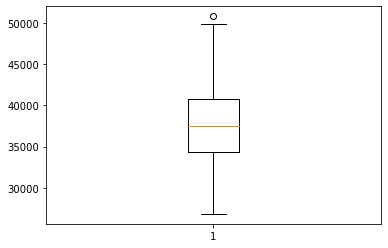

In [60]:
plt.boxplot(time_data)
plt.show()


In [61]:
from statsmodels.tsa.stattools import adfuller
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [62]:
adf_test(time_data['Total Price'])

ADF Statistics: -9.146527831696288
p- value: 2.7584085946798673e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


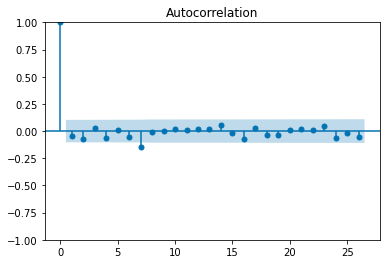

In [63]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(time_data["Total Price"].dropna())

C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


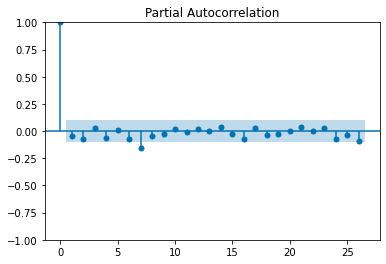

In [64]:
pacf = plot_pacf(time_data["Total Price"].dropna())

In [65]:
time_data.index = pd.to_datetime(time_data.index)

In [144]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
train = time_data.iloc[:int(0.7*len(time_data))]
test = time_data.iloc[int(0.7*len(time_data)):]
test

,Total Price
Date,
2022-10-14,38329.94
2022-10-15,30530.14
2022-10-16,39806.12
2022-10-17,32348.52
2022-10-18,33991.08
...,...
2023-01-29,34874.90
2023-01-30,34304.96
2023-01-31,37057.90


In [171]:

#time_data.index = pd.to_datetime(time_data['Date'])
#time_data = time_data.drop(columns=['Date'])

# Split the data into train and test sets
train = time_data[:int(0.7 * len(time_data))]
test = time_data[int(0.7 * len(time_data)):]

# Fit the ARIMA model
model = ARIMA(train, order=(9,0,7))
model_fit = model.fit()

# Predict values for the test set
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
pred = pd.Series(predictions, index=test.index)
pred

C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

Date
2022-10-17    37881.696045
2022-10-18    36382.328843
2022-10-19    36648.427884
2022-10-20    38854.725310
2022-10-21    39381.864530
                  ...     
2023-01-30    36825.095389
2023-01-31    37345.200402
2023-02-01    37251.547731
2023-02-02    36620.343787
2023-02-03    36813.412177
Name: predicted_mean, Length: 110, dtype: float64

In [172]:
residuals=test['Total Price']-pred
residuals

Date
2022-10-17    -5533.176045
2022-10-18    -2391.248843
2022-10-19      887.372116
2022-10-20      943.134690
2022-10-21    -7342.504530
                  ...     
2023-01-30    -2520.135389
2023-01-31     -287.300402
2023-02-01    -1617.907731
2023-02-02     2700.796213
2023-02-03   -33334.772177
Length: 110, dtype: float64

<AxesSubplot:ylabel='Density'>

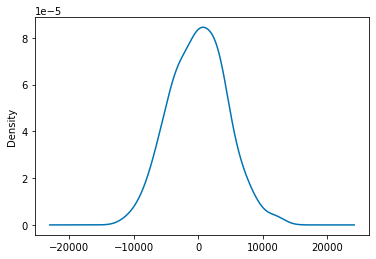

In [173]:
model_Arima_fit.resid.plot(kind='kde')

In [174]:
test['Predicted_ARIMA']=pred

C:\Users\MOHANKUMAR\AppData\Local\Temp\ipykernel_17308\3659209281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_ARIMA']=pred


In [175]:
test

,Total Price,Predicted_ARIMA
Date,,
2022-10-17,32348.52,37881.696045
2022-10-18,33991.08,36382.328843
2022-10-19,37535.80,36648.427884
2022-10-20,39797.86,38854.725310
2022-10-21,32039.36,39381.864530
...,...,...
2023-01-30,34304.96,36825.095389
2023-01-31,37057.90,37345.200402
2023-02-01,35633.64,37251.547731


<AxesSubplot:xlabel='Date'>

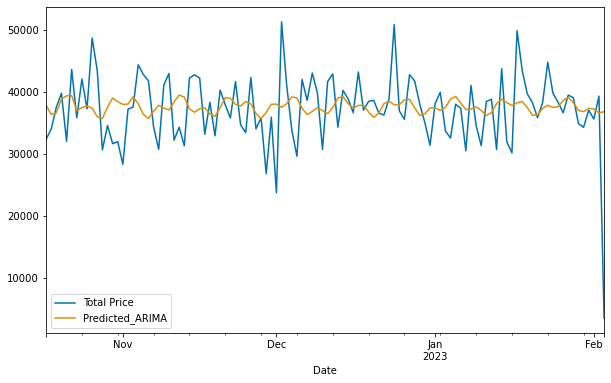

In [176]:
test[['Total Price','Predicted_ARIMA']].plot(figsize=(10,6))

In [235]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(3, 0, 2), seasonal_order=(0, 2, 2,4))
model_fit = model.fit()

# Use the fitted model to make predictions on the test set
prediction = model_fit.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [236]:
prediction

2022-10-17    37606.420259
2022-10-18    37420.557993
2022-10-19    34906.604564
2022-10-20    40126.676717
2022-10-21    37653.416560
                  ...     
2023-01-30    33373.477555
2023-01-31    28337.398609
2023-02-01    38026.633092
2023-02-02    33466.907193
2023-02-03    32945.195866
Freq: D, Name: predicted_mean, Length: 110, dtype: float64

In [237]:
residual=test['Total Price']-prediction
residual

Date
2022-10-17    -5257.900259
2022-10-18    -3429.477993
2022-10-19     2629.195436
2022-10-20     -328.816717
2022-10-21    -5614.056560
                  ...     
2023-01-30      931.482445
2023-01-31     8720.501391
2023-02-01    -2392.993092
2023-02-02     5854.232807
2023-02-03   -29466.555866
Length: 110, dtype: float64

In [238]:
test['Predicted_SARIMA']=prediction

C:\Users\MOHANKUMAR\AppData\Local\Temp\ipykernel_17308\3269503550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted_SARIMA']=prediction


<AxesSubplot:xlabel='Date'>

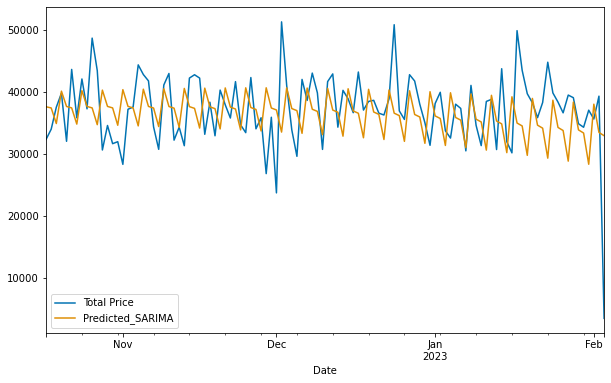

In [239]:
test[['Total Price','Predicted_SARIMA']].plot(figsize=(10,6))

In [80]:
n = len(time_data)
split_point = int(n * 0.7) # 70% of the data for training, 30% for testing
sales_train = time_data[:split_point]
sales_test = time_data[split_point:]

In [81]:
import statsmodels.api as sm

# Fit the ARIMA model to the training data
model = sm.tsa.ARIMA(sales_train, order=(9, 2,7))
model_fit = model.fit()

# Make predictions for the testing data
predictions =predictions = model_fit.predict(start=split_point, end=n-1, dynamic=False)
predictions =pd.DataFrame(predictions)

C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MOHANKUMAR\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parame

In [82]:
predictions

,predicted_mean
252,38227.408945
253,37151.861124
254,35537.471174
255,39432.705923
256,38275.328886
...,...
356,40047.495013
357,39446.201799
358,40089.743788
359,39385.924738


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error

# Calculate the error metrics
mse = mean_squared_error(sales_test, predictions)
mae = mean_absolute_error(sales_test, predictions)
msle = mean_squared_log_error(sales_test, predictions)
rmsle = np.sqrt(msle)
medae = median_absolute_error(sales_test, predictions)

# Print the error metrics
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Log Error: ", rmsle)
print("Median Absolute Error: ", medae)

Mean Squared Error:  23142274.1042111
Mean Absolute Error:  3879.6754678744005
Root Mean Squared Log Error:  0.13185848962563523
Median Absolute Error:  3270.968660032995


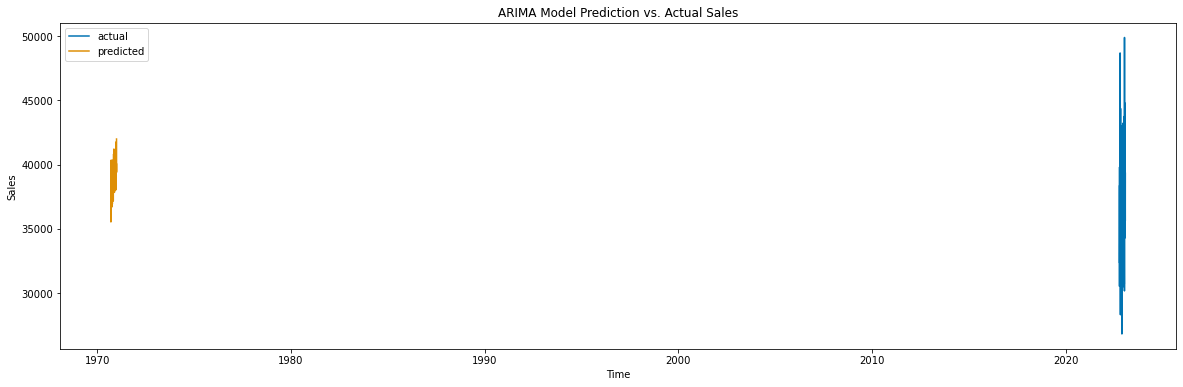

In [84]:

# Plot the predicted values against the actual values
plt.subplots(figsize=(20,6))
plt.plot(sales_test, label='actual')
plt.plot(predictions, label='predicted')

# Add labels and title to the plot
plt.xlabel('Time')
plt.ylabel('Sales')
plt.title('ARIMA Model Prediction vs. Actual Sales')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [85]:
# Calculate the MSE, MAE, RMSE, and MedAE
mse = mean_squared_error(sales_test, predictions)
mae = mean_absolute_error(sales_test, predictions)
rmse = np.sqrt(mean_squared_error(sales_test, predictions))
medae = median_absolute_error(sales_test, predictions)

# Print the results
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("Median Absolute Error: ", medae)

Mean Squared Error:  23142274.1042111
Mean Absolute Error:  3879.6754678744005
Root Mean Squared Error:  4810.641755962618
Median Absolute Error:  3270.968660032995
